# Detectron2: Detect objects from webcam videostream
<img src="https://dl.fbaipublicfiles.com/detectron2/Detectron2-Logo-Horz.png" width="500">

## Inference with pre-trained model

In [5]:
# import some common detectron2 utilities
from detectron2.engine import DefaultPredictor
from detectron2.config import get_cfg
from detectron2.utils.visualizer import Visualizer
from detectron2.data import MetadataCatalog
import cv2

import numpy as np
from IPython.display import clear_output, Image, display, HTML
import base64

In [6]:
!pwd
!ls

/home/selcuk/PycharmProjects/SingleShotMultiboxDetector_demo
 asset
 detected.png
 Detectron2_detect_objects_from_webcam_videostream.ipynb
 LICENSE
 lsp
 README.md
'SSD Single Shot MultiBox Detector.pdf'


In [15]:
import torch
torch.load()

In [16]:
# Create config
cfg = get_cfg()
# use pre-trained faster r-cnn with resnet-101 backend(backbone).
faster_r_cnn = "/home/selcuk/Desktop/detectron2/configs/COCO-Detection/faster_rcnn_R_101_FPN_3x.yaml"
ssd300 = "/home/selcuk/Desktop/detectron2/configs/Base-SSD.yaml"
cfg.merge_from_file(faster_r_cnn)
# TODO: Tune threash hold for detected.png error region.
cfg.MODEL.ROI_HEADS.SCORE_THRESH_TEST = 0.7  # set threshold for this model. Otherwise it shows all the low porobability regions.
#
faster_r_cnn_weights = "detectron2://COCO-Detection/faster_rcnn_R_101_FPN_3x/137851257/model_final_f6e8b1.pkl"
ssd300_weights = "/home/selcuk/Desktop/detectron2_ssd_vgg.pth"
cfg.MODEL.WEIGHTS = faster_r_cnn_weights

cfg.
print(cfg)

CUDNN_BENCHMARK: False
DATALOADER:
  ASPECT_RATIO_GROUPING: True
  FILTER_EMPTY_ANNOTATIONS: True
  NUM_WORKERS: 4
  REPEAT_THRESHOLD: 0.0
  SAMPLER_TRAIN: TrainingSampler
DATASETS:
  PRECOMPUTED_PROPOSAL_TOPK_TEST: 1000
  PRECOMPUTED_PROPOSAL_TOPK_TRAIN: 2000
  PROPOSAL_FILES_TEST: ()
  PROPOSAL_FILES_TRAIN: ()
  TEST: ('coco_2017_val',)
  TRAIN: ('coco_2017_train',)
GLOBAL:
  HACK: 1.0
INPUT:
  CROP:
    ENABLED: False
    SIZE: [0.9, 0.9]
    TYPE: relative_range
  FORMAT: BGR
  MASK_FORMAT: polygon
  MAX_SIZE_TEST: 1333
  MAX_SIZE_TRAIN: 1333
  MIN_SIZE_TEST: 800
  MIN_SIZE_TRAIN: (640, 672, 704, 736, 768, 800)
  MIN_SIZE_TRAIN_SAMPLING: choice
MODEL:
  ANCHOR_GENERATOR:
    ANGLES: [[-90, 0, 90]]
    ASPECT_RATIOS: [[0.5, 1.0, 2.0]]
    NAME: DefaultAnchorGenerator
    OFFSET: 0.0
    SIZES: [[32], [64], [128], [256], [512]]
  BACKBONE:
    FREEZE_AT: 2
    NAME: build_resnet_fpn_backbone
  DEVICE: cuda
  FPN:
    FUSE_TYPE: sum
    IN_FEATURES: ['res2', 'res3', 'res4', 'res5']
  

In [8]:
# Create predictor
predictor = DefaultPredictor(cfg)

In [9]:
!ls

 asset
 detected.png
 Detectron2_detect_objects_from_webcam_videostream.ipynb
 LICENSE
 lsp
 README.md
'SSD Single Shot MultiBox Detector.pdf'


{'instances': Instances(num_instances=3, image_height=725, image_width=1284, fields=[pred_boxes = Boxes(tensor([[ 125.6953,  197.1183, 1019.6539,  713.9720],
        [ 439.3062,  434.8007,  519.7761,  720.9409],
        [ 710.1342,   47.4249, 1139.2734,  710.2794]], device='cuda:0')), scores = tensor([0.9975, 0.9937, 0.9918], device='cuda:0'), pred_classes = tensor([ 0, 27,  0], device='cuda:0'), ])}


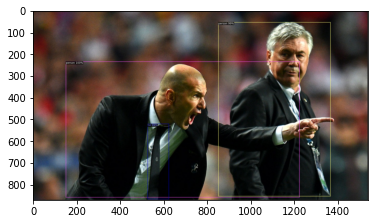

In [10]:
%matplotlib inline
from matplotlib import pyplot as plt
image_path = "/home/selcuk/Desktop/image.png"
im = cv2.imread(image_path)
outputs = predictor(im)  # get probabilities of location and class
print(outputs)

v = Visualizer(im[:, :, ::-1], MetadataCatalog.get(cfg.DATASETS.TRAIN[0]), scale=1.2)
v = v.draw_instance_predictions(outputs["instances"].to("cpu"))
image = v.get_image()[:, :, ::-1]
cv2.imwrite('detected.png', image)
plt.imshow(v.get_image())  # saved image correct. Fix it later.
plt.show()

In [5]:
def array_show(imageArray):
    ret, png = cv2.imencode('.png', imageArray)
    encoded = base64.b64encode(png)
    return Image(data=encoded.decode('ascii'))

# !!!  NOTE: IT DOESN'T WORK WITH JUPYTER OR COLAB. needs a different a approach  !!!
cap = cv2.VideoCapture(0)

while True:
    ret, image = cap.read()
    
    outputs = predictor(image)

    v = Visualizer(image[:, :, ::-1], MetadataCatalog.get(cfg.DATASETS.TRAIN[0]), scale=1.2)
    v = v.draw_instance_predictions(outputs["instances"].to("cpu"))
    img = array_show(v.get_image()[:, :, ::-1])
    display(img)